In [1]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:

df=pd.read_csv('/Users/shravankumarakula/Documents/pythonWorkspace/Time Signals/reflected.csv',parse_dates=['Timestamp'], 
  index_col="Timestamp", skiprows=range(1,2000), nrows=1500)
df=df.dropna()
print('Shape of data',df.shape)
df.head()



Shape of data (1500, 1)


,Frequency
Timestamp,
35.144165,-0.007376
35.161747,-0.004971
35.179329,-0.001339
35.196907,0.002648
35.214489,0.006018


#Plot Your Data

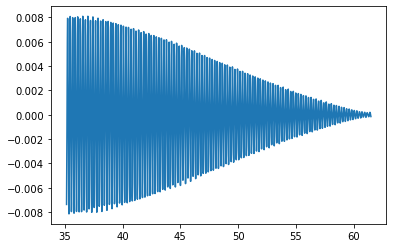

In [4]:
ts = df['Frequency']
plt.plot(ts)

#Check For Stationarity

In [5]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [6]:
print(df.shape)
train=df.iloc[:1000]
#test=df.iloc[-500:]
test=df.iloc[1000:1500]
print(test)
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(1500, 1)
           Frequency
Timestamp           
52.725040  -0.001394
52.742622  -0.000099
52.760201   0.001202
52.777782   0.002182
52.795364   0.002607
...              ...
61.427570   0.000189
61.445152   0.000128
61.462734   0.000032
61.480316  -0.000070
61.497894  -0.000149

[500 rows x 1 columns]
(1000, 1) (500, 1)
Frequency   -0.001394
Name: 52.72504044, dtype: float64 Frequency   -0.000149
Name: 61.49789429, dtype: float64


In [7]:
adf_test(df['Frequency'])

1. ADF :  -1.8583797076388744
2. P-Value :  0.3518866156585638
3. Num Of Lags :  24
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1475
5. Critical Values :
	 1% :  -3.434791163965702
	 5% :  -2.8635014840083945
	 10% :  -2.5678142741740877


#Figure Out Order for ARIMA Model

In [8]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [9]:
stepwise_fit = auto_arima(train['Frequency'], trace = True,
                          suppress_warnings=True)           

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-18375.224, Time=0.50 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-8039.244, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-9491.813, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-8041.243, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.17 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-19321.123, Time=1.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.94 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-17716.813, Time=1.19 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-20207.072, Time=0.73 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-23244.814, Time=1.08 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-16642.325, Time=1.65 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=-

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:               SARIMAX(4, 0, 2)   Log Likelihood               11630.407
Date:                Mon, 25 Oct 2021   AIC                         -23244.814
Time:                        05:36:51   BIC                         -23205.552
Sample:                             0   HQIC                        -23229.892
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -2.221e-06   3.72e-07     -5.964      0.000   -2.95e-06   -1.49e-06
ar.L1          3.1839   8.92e-05   3.57e+04      0.000       3.184       3.184
ar.L2         -4.5036   2.89e-05  -1.56e+05      0.000      -4.504      -4.503
ar.L3          3.1747      0.000   2.15e+04      0.000       3.174       3.175
ar.L4         -0.9945      0.000  -7409.818      0.000      -0.995      -0.994
ma.L1          0.2822   2.86e-06   9.88e+04      0.000       0.282       0.282
ma.L2          0.3329   1.55e-06   2.14e+05      0.000       0.333       0.333
sigma2      5.208e-12   1.26e-10      0.041      0.967   -2.42e-10    2.53e-10
===================================================================================
Ljung-Box (L1) (Q):                  64.91   Jarque-Bera (JB):           6321196.99
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.25   Skew:                           -13.28
Prob(H) (two-sided):                  0.00   Kurtosis:                       391.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.31e+19. Standard errors may be unstable.
"""

## Train the Model

In [10]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['Frequency'],order=(4,0,2))
model=model.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Frequency   No. Observations:                 1000
Model:                 ARIMA(4, 0, 2)   Log Likelihood               10565.197
Date:                Mon, 25 Oct 2021   AIC                         -21114.393
Time:                        05:37:04   BIC                         -21075.131
Sample:                             0   HQIC                        -21099.471
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.907e-06   5.27e-05     -0.036      0.971      -0.000       0.000
ar.L1          3.1838      0.001   4638.166      0.000       3.182       3.185
ar.L2         -4.5032      0.001  -7556.508      0.000      -4.504      -4.502
ar.L3          3.1743      0.000   9002.071      0.000       3.174       3.175
ar.L4         -0.9943      0.000  -5652.874      0.000      -0.995      -0.994
ma.L1          0.2929    1.1e-06   2.66e+05      0.000       0.293       0.293
ma.L2          0.3436   5.81e-07   5.92e+05      0.000       0.344       0.344
sigma2          1e-10   6.35e-11      1.575      0.115   -2.44e-11    2.24e-10
===================================================================================
Ljung-Box (L1) (Q):                  72.96   Jarque-Bera (JB):           5542957.06
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.08   Skew:                           -11.92
Prob(H) (two-sided):                  0.00   Kurtosis:                       366.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.05e+22. Standard errors may be unstable.
"""

#Make Predictions on Test Set

1000   -0.001393
1001   -0.000095
1002    0.001210
1003    0.002198
1004    0.002630
          ...   
1495   -0.000692
1496   -0.001412
1497   -0.001776
1498   -0.001697
1499   -0.001200
Name: ARIMA predictions, Length: 500, dtype: float64


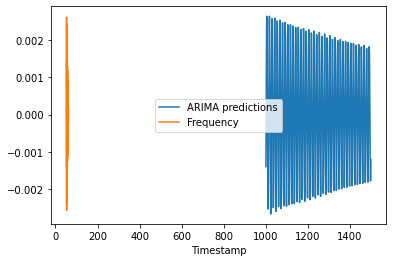

In [11]:
start=len(train)
end=len(train)+len(test)-1

pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')

pred.plot(legend=True)
test['Frequency'].plot(legend=True)
print(pred)


In [12]:
test['Frequency'].mean()

7.019808112799997e-06

In [13]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['Frequency']))
print(rmse)


0.0007992497420935347


#To predict for next 30 observations

In [14]:

pred=model.predict(start=len(train),end=len(train)+30).rename('ARIMA Predictions')
#print(len(train))
print(pred)
#print(pred.to_string(index=False))

1000   -0.001393
1001   -0.000095
1002    0.001210
1003    0.002198
1004    0.002630
1005    0.002412
1006    0.001609
1007    0.000423
1008   -0.000856
1009   -0.001924
1010   -0.002525
1011   -0.002516
1012   -0.001894
1013   -0.000803
1014    0.000495
1015    0.001684
1016    0.002464
1017    0.002632
1018    0.002136
1019    0.001097
1020   -0.000225
1021   -0.001490
1022   -0.002375
1023   -0.002656
1024   -0.002266
1025   -0.001314
1026   -0.000047
1027    0.001214
1028    0.002160
1029    0.002565
1030    0.002342
Name: ARIMA Predictions, dtype: float64


In [15]:
df1=pd.read_csv('/Users/shravankumarakula/Documents/pythonWorkspace/Time Signals/reflected.csv',parse_dates=['Timestamp'], 
  index_col="Timestamp", skiprows=range(1,3000), nrows=30)
df1=df1.dropna()
print('Shape of data',df1.shape)
print(df1)

Shape of data (30, 1)
           Frequency
Timestamp           
52.725040  -0.001394
52.742622  -0.000099
52.760201   0.001202
52.777782   0.002182
52.795364   0.002607
52.812942   0.002387
52.830524   0.001589
52.848106   0.000420
52.865688  -0.000836
52.883266  -0.001880
52.900848  -0.002465
52.918430  -0.002456
52.936008  -0.001853
52.953590  -0.000796
52.971172   0.000464
52.988754   0.001621
53.006332   0.002384
53.023914   0.002557
53.041496   0.002085
53.059078   0.001081
53.076656  -0.000200
53.094238  -0.001429
53.111820  -0.002287
53.129398  -0.002557
53.146980  -0.002177
53.164562  -0.001257
53.182144  -0.000041
53.199722   0.001158
53.217304   0.002048
53.234886   0.002421


In [16]:
print(df.to_string(index=False))

    Frequency
-7.376382e-03
-4.971324e-03
-1.339279e-03
 2.647892e-03
 6.018081e-03
 7.929516e-03
 7.882993e-03
 5.859614e-03
 2.342710e-03
-1.791755e-03
-5.493573e-03
-7.813476e-03
-8.154565e-03
-6.434432e-03
-3.103229e-03
 9.799126e-04
 4.779413e-03
 7.351283e-03
 8.080241e-03
 6.819477e-03
 3.906990e-03
 6.930000e-05
-3.762418e-03
-6.672000e-03
-7.965283e-03
-7.327810e-03
-4.899699e-03
-1.248714e-03
 2.749128e-03
 6.111190e-03
 7.986119e-03
 7.874903e-03
 5.773065e-03
 2.190931e-03
-1.966181e-03
-5.632302e-03
-7.864623e-03
-8.096033e-03
-6.284226e-03
-2.913600e-03
 1.143494e-03
 4.864386e-03
 7.339299e-03
 7.989136e-03
 6.690652e-03
 3.785385e-03
-1.620000e-05
-3.805431e-03
-6.681398e-03
-7.952647e-03
-7.296096e-03
-4.841037e-03
-1.156312e-03
 2.867223e-03
 6.225097e-03
 8.051294e-03
 7.852077e-03
 5.652201e-03
 2.002283e-03
-2.159465e-03
-5.758441e-03
-7.875264e-03
-7.987401e-03
-6.099144e-03
-2.722077e-03
 1.275109e-03
 4.901445e-03
 7.287900e-03
 7.886462e-03
 6.581672e-03
 3.699

In [17]:
print(pred.head(), df1.head())
#print(pred, df1)

1000   -0.001393
1001   -0.000095
1002    0.001210
1003    0.002198
1004    0.002630
Name: ARIMA Predictions, dtype: float64            Frequency
Timestamp           
52.725040  -0.001394
52.742622  -0.000099
52.760201   0.001202
52.777782   0.002182
52.795364   0.002607


<AxesSubplot:>

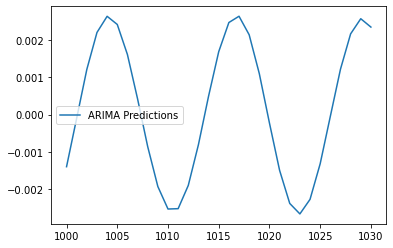

In [18]:
pred.plot(legend=True)


<AxesSubplot:xlabel='Timestamp'>

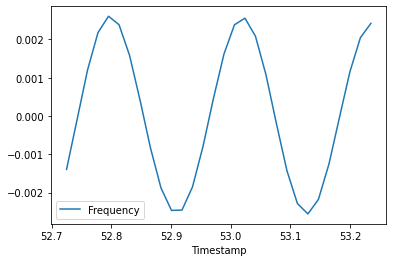

In [19]:
df1.plot(legend=True)